# Mineração de Dados - Trabalho Prático (1ª tentativa)

- **Aluna:** Bárbara Neves
- **Matrícula:** 388713

## Descrição do Trabalho

***Toxic Comment Classification*: Identifique e classifique comentários "tóxicos"**, foi retirado das competições da Plataforma *Kaggle* e se trata de um problema de Regressão e Processamento de Linguagem Natural (LPN).

O objetivo é criar um *multi-headed model* capaz de detectar diferentes tipos de comentários tóxicos, como os que possuem ameaças, obscenidade, insultos e ódio baseado em identidade. 

Este modelo deve prever a **probabilidade** de comportamento tóxico para cada comentário.

## Imports Iniciais

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

## Leitura e Exploração dos Dados 

In [30]:
# df_train = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/train.csv')
# df_test = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test.csv')
# submission = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv')

df_train = pd.read_csv('Dataset/train.csv')
df_test = pd.read_csv('Dataset/test.csv')
submission = pd.read_csv('Dataset/sample_submission.csv')

In [31]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [32]:
labels = ['obscene', 'insult', 'toxic', 'severe_toxic', 'identity_hate', 'threat']

for label in labels :
    print("Entidade: ", label)
    print(df_train[label].value_counts(), '\n')

Entidade:  obscene
0    151122
1      8449
Name: obscene, dtype: int64 

Entidade:  insult
0    151694
1      7877
Name: insult, dtype: int64 

Entidade:  toxic
0    144277
1     15294
Name: toxic, dtype: int64 

Entidade:  severe_toxic
0    157976
1      1595
Name: severe_toxic, dtype: int64 

Entidade:  identity_hate
0    158166
1      1405
Name: identity_hate, dtype: int64 

Entidade:  threat
0    159093
1       478
Name: threat, dtype: int64 



Para os **dados de treino**, o número **0** indica que o comentário não foi classificado para uma determinada entidade, e o número **1** indica que ele foi classificado.

In [33]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [34]:
submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


### Valores Faltantes

In [35]:
print("Quantidade de valores faltantes nos dados de treino:")
df_train.isna().sum()

Quantidade de valores faltantes nos dados de treino:


id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [36]:
print("Quantidade de valores faltantes nos dados de teste:")
df_test.isna().sum()

Quantidade de valores faltantes nos dados de teste:


id              0
comment_text    0
dtype: int64

Como verificado anteriormente, não existem valores faltantes. Entretanto, podem existir comentários com campos "nulos". 

### Comentários Nulos

In [37]:
coment_nulo = {}
coment_nulo['Treino'] = {'Quantidade' : len(df_train[df_train['comment_text'].isnull()])}
coment_nulo['Teste'] = {'Quantidade' : len(df_test[df_test['comment_text'].isnull()])}

print("Comentários nulos nos dados de:")
for key in coment_nulo :
    print(str(key) + ' = ' + str(coment_nulo[key]['Quantidade']))

Comentários nulos nos dados de:
Treino = 0
Teste = 0


Os conjuntos de treino e teste não possuem comentários nulos. 

### Comentários Sem Classificação

In [38]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Percebe-se que os valores médios (*mean*) são muito pequenos (um pouco abaixo de 0.05). Aparentemente, muitos comentários não estão rotulados em nenhuma das seis categorias.

In [39]:
df_train.shape, df_test.shape

((159571, 8), (153164, 2))

In [40]:
comments_unlabelled_train = df_train[(df_train['toxic'] != 1) & (df_train['severe_toxic'] != 1) & 
                                     (df_train['obscene'] != 1) & (df_train['threat'] != 1) & 
                                     (df_train['insult'] != 1) & (df_train['identity_hate'] != 1)]

print('Percentual de comentários sem classificação: ', str(len(comments_unlabelled_train) / len(df_train)*100) + 
      '%\nQuantidade de comentários de cada categoria:')
print(df_train[labels].sum())

Percentual de comentários sem classificação:  89.83211235124176%
Quantidade de comentários de cada categoria:
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


### Correlação

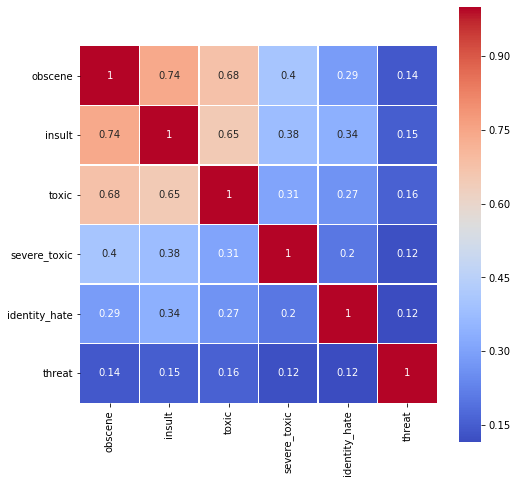

In [41]:
data = df_train[labels]

colormap = plt.cm.coolwarm
plt.figure(figsize = (8,8))

sns.heatmap(data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', 
            annot=True);

O quadro acima mostra que muitas das labels possuem correlação forte. Por exemplo, **insult - obscene** tem o valor mais alto em 0.74, seguido de **toxic - obscene** e **toxic - insult**.

Portanto, este problema não trata cada rótulo como um único problema de classificação separado, já que há correlação entre os vários rótulos.

## Pré-Processamento dos Dados

### Padronizando os Comentários

In [42]:
df_train['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
5         "\n\nCongratulations from me as well, use the ...
6              COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7         Your vandalism to the Matt Shirvington article...
8         Sorry if the word 'nonsense' was offensive to ...
9         alignment on this subject and which are contra...
10        "\nFair use rationale for Image:Wonju.jpg\n\nT...
11        bbq \n\nbe a man and lets discuss it-maybe ove...
12        Hey... what is it..\n@ | talk .\nWhat is it......
13        Before you start throwing accusations and warn...
14        Oh, and the girl above started her arguments w...
15        "\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...
16        Bye! \n\nDon't look, come or t

In [43]:
df_test['comment_text']

0         Yo bitch Ja Rule is more succesful then you'll...
1         == From RfC == \n\n The title is fine as it is...
2         " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3         :If you have a look back at the source, the in...
4                 I don't anonymously edit articles at all.
5         Thank you for understanding. I think very high...
6         Please do not add nonsense to Wikipedia. Such ...
7                          :Dear god this site is horrible.
8         " \n Only a fool can believe in such numbers. ...
9         == Double Redirects == \n\n When fixing double...
10        I think its crap that the link to roggenbier i...
11        "::: Somebody will invariably try to add Relig...
12        , 25 February 2010 (UTC) \n\n :::Looking it ov...
13        " \n\n It says it right there that it IS a typ...
14        " \n\n == Before adding a new product to the l...
15        ==Current Position== \n Anyone have confirmati...
16                                 this 

In [44]:
def padroniza_df(df, func) :
    
    df = df.map(lambda coment : func(coment))
                
    return df

#### Função de padronização

In [45]:
import re

def padroniza_texto(texto):
    
    texto = texto.encode('ascii', errors = 'ignore').decode() #Decodificando caracteres em ASCII
    texto = texto.lower() #Apenas caracteres minúsculos
    texto = re.sub(r'http\S+', ' ', texto) #Evitando links
    texto = re.sub(r'#+', ' ', texto)
    texto = re.sub(r'@[A-Za-z0-9]+', ' ', texto)
    texto = re.sub(r"([A-Za-z]+)'s", r"\1 is", texto)
    texto = re.sub(r"what's", "what is ", texto) #Evitando contrações
    texto = re.sub(r"\'s", " ", texto) #Evitando contrações
    texto = re.sub(r"won't", "will not ", texto) #Evitando contrações
    texto = re.sub(r"\'ve", " have ", texto) #Evitando contrações
    texto = re.sub(r"can't", "can not ", texto) #Evitando contrações
    texto = re.sub(r"n't", " not ", texto) #Evitando contrações
    texto = re.sub(r"isn't", "is not ", texto) #Evitando contrações
    texto = re.sub(r"i'm", "i am ", texto) #Evitando contrações
    texto = re.sub(r"\'re", " are ", texto) #Evitando contrações
    texto = re.sub(r"\'d", " would ", texto) #Evitando contrações
    texto = re.sub(r"\'ll", " will ", texto) #Evitando contrações
    texto = re.sub(r"\'scuse", " excuse ", texto) #Evitando contrações
    texto = re.sub('\W', ' ', texto)
    texto = re.sub('\s+', ' ', texto)
    texto = re.sub(r'\d+', ' ', texto)
    texto = texto.strip(' ') #Removendo espaços do começo e fim 
    
    return texto

In [46]:
df_train['comment_text'] = padroniza_df(df_train['comment_text'], padroniza_texto)
df_test['comment_text'] = padroniza_df(df_test['comment_text'], padroniza_texto)

#### Função que remove as stopwords

In [47]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def remove_stopwords(texto):
    
    stop_words = set(stopwords.words('english')) 
  
    word_tokens = word_tokenize(texto) 
  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
        
    return filtered_sentence

In [48]:
df_train['comment_text'] = padroniza_df(df_train['comment_text'], remove_stopwords)
df_test['comment_text'] = padroniza_df(df_test['comment_text'], remove_stopwords)

In [49]:
df_train['comment_text'].head()

0    [explanation, edits, made, username, hardcore,...
1    [aww, matches, background, colour, seemingly, ...
2    [hey, man, really, trying, edit, war, guy, con...
3    [make, real, suggestions, improvement, wondere...
4                  [sir, hero, chance, remember, page]
Name: comment_text, dtype: object

In [50]:
df_test['comment_text'].head()

0    [yo, bitch, ja, rule, succesful, ever, whats, ...
1                              [rfc, title, fine, imo]
2                     [sources, zawe, ashton, lapland]
3    [look, back, source, information, updated, cor...
4                        [anonymously, edit, articles]
Name: comment_text, dtype: object

## Resolvendo o Problema de *Multi-label Classification*

### Separando os dados de treino e teste

#### X

In [54]:
X_train = df_train['comment_text']
X_test = df_test['comment_text']

In [55]:
X_train.shape, X_test.shape

((159571,), (153164,))

### Processo de Tokenização

In [66]:
# Imports necessários
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [67]:
# Função que conta a quantidade de palavras de cada comentário
def word_count(vector):
    
    count = 0
    
    for word in vector :
        count += 1

    return count

#### 5 maiores números de palavras presente nos comentários dos dados de treino

In [68]:
new_df_train = df_train
new_df_train['number_of_words'] = df_train['comment_text'].apply(lambda x: word_count(x))

new_df_train.nlargest(5, 'number_of_words')

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,number_of_words
32143,5572234220e43ea2,"[pig, pig, pig, pig, pig, pig, pig, pig, pig, ...",1,0,0,0,0,0,1250
61793,a55e3736cb1c2db1,"[oh, noes, oh, noes, oh, noes, oh, noes, oh, n...",0,0,0,0,0,0,1250
76598,cd135d9358a9e9ea,"[die, fag, die, fag, die, fag, die, fag, die, ...",1,0,0,0,0,0,1250
150039,65d66bf057752682,"[lol, lol, lol, lol, lol, lol, lol, lol, lol, ...",0,0,0,0,0,0,1250
153353,9bb20c51c9fec236,"[fat, jew, fat, jew, fat, jew, fat, jew, fat, ...",1,0,0,0,1,1,1247


#### 5 maiores números de palavras presentes nos comentários dos dados de teste

In [69]:
new_df_test = df_test
new_df_test['number_of_words'] = df_train['comment_text'].apply(lambda x: word_count(x))

new_df_test.nlargest(5, 'number_of_words')

,id,comment_text,number_of_words
32143,356dc28bb6efe0c4,"[bishop, bath, wells, blackadder, also, eats, ...",1250
61793,66d3433cd7cf3ac2,"[platypus, hey, opinion, requested, talk, page...",1250
76598,7fba8b18a475333f,"[ga, review, review, transcluded, talk, giro, ...",1250
150039,fac62ec6a184a9e1,"[actually, discussing, content, dispute, peopl...",1250
32400,35db036daf8b6bc0,"[speedy, deletion, jason, nitsch, tag, placed,...",1235


#### Treino

In [70]:
X_train_tokenizer = Tokenizer(num_words=1500)
X_train_tokenizer.fit_on_texts(X_train.values)

In [71]:
X_train_tokens = X_train_tokenizer.texts_to_sequences(X_train.values)
X_train_tokens = pad_sequences(X_train_tokens, maxlen=100)
                               
X_train_tokens

array([[   0,    0,    0, ...,    4,    2,   57],
       [   0,    0,    0, ...,    4,  798,   81],
       [   0,    0,    0, ...,  299,  570,  336],
       ...,
       [   0,    0,    0, ...,    0,  570,    1],
       [   0,    0,    0, ...,  264,   53,   62],
       [   0,    0,    0, ...,  368,  237, 1409]], dtype=int32)

In [72]:
X_train.shape, X_train_tokens.shape

((159571,), (159571, 100))

#### Teste

In [73]:
X_test_tokenizer = Tokenizer(num_words=1500)
X_test_tokenizer.fit_on_texts(X_test.values)

In [74]:
X_test_tokens = X_test_tokenizer.texts_to_sequences(X_test.values)
X_test_tokens = pad_sequences(X_test_tokens, maxlen=100)

X_test_tokens

array([[  0,   0,   0, ...,  56, 359,  17],
       [  0,   0,   0, ..., 896, 249, 496],
       [  0,   0,   0, ...,   0,   0,  27],
       ...,
       [  0,   0,   0, ..., 346, 292, 346],
       [  0,   0,   0, ..., 756, 183,  21],
       [  0,   0,   0, ..., 324, 179,  26]], dtype=int32)

In [75]:
X_test.shape, X_test_tokens.shape

((153164,), (153164, 100))

### Criação do Modelo

In [96]:
# Imports necessários
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0, max_iter=1500, solver='lbfgs')

#### Modelo de LogisticRegression

Primeiro será utilizado o algoritmo LogisticRegression para gerar resultados como se esse problema fosse um problema binário.

In [91]:
submission_binary = pd.read_csv('Dataset/sample_submission.csv')

In [92]:
pbar = tqdm_notebook(total=len(labels))
count = 0

for label in labels:
    
    pbar.set_description("Processando {}".format(label))
    
    y_true = df_train[label]

    logreg.fit(X_train_tokens, y_true)

    y_pred = logreg.predict(X_train_tokens)
    
    count += 1 
    
    print(str(count) + '. Valor da acurácia para ' + label + ': {}'.format(accuracy_score(y_true, y_pred)))
    
    y_test_prob = logreg.predict_proba(X_test_tokens)[:,1]
    
    submission_binary[label] = y_test_prob
    
    pbar.update(1)

1. Valor da acurácia para obscene: 0.947051782592075
2. Valor da acurácia para insult: 0.9506489274366896
3. Valor da acurácia para toxic: 0.9041555169799024
4. Valor da acurácia para severe_toxic: 0.9900169830357647
5. Valor da acurácia para identity_hate: 0.9911951419744189
6. Valor da acurácia para threat: 0.9970044682304429


In [93]:
submission_binary.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.050793,0.003565,0.025554,0.000928,0.026586,0.003160
1,0000247867823ef7,0.136844,0.014520,0.077011,0.004508,0.073679,0.012440
2,00013b17ad220c46,0.105588,0.010978,0.061502,0.002166,0.055238,0.007722
3,00017563c3f7919a,0.073649,0.008002,0.038862,0.002558,0.036094,0.007899
4,00017695ad8997eb,0.105309,0.010967,0.061375,0.002160,0.055098,0.007694


Agora o algoritmo LogisticRegression está sendo usado para tratar esse problema como multiclasse.

In [94]:
submission_chains = pd.read_csv('Dataset/sample_submission.csv')

def add_feature(X, feature_to_add):
    
    from scipy.sparse import csr_matrix, hstack
    
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [98]:
pbar_2 = tqdm_notebook(total=len(labels))
count_2 = 0

for label in labels:
    
    pbar_2.set_description("Processando {}".format(label))

    y_true = df_train[label]
    
    logreg.fit(X_train_tokens, y_true)

    y_pred = logreg.predict(X_train_tokens)
    
    count_2 += 1
    
    print(str(count_2) + '. Valor da acurácia para ' + label + ': {}'.format(accuracy_score(y_true, y_pred)))

    y_test = logreg.predict(X_test_tokens)
    
    y_test_prob = logreg.predict_proba(X_test_tokens)[:,1]
    
    submission_chains[label] = y_test_prob

    X_train_tokens = add_feature(X_train_tokens, y_true)
   
    X_test_tokens = add_feature(X_test_tokens, y_test)
    
    pbar_2.update(1)

/home/lorien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1. Valor da acurácia para obscene: 1.0


/home/lorien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


2. Valor da acurácia para insult: 1.0


/home/lorien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


3. Valor da acurácia para toxic: 1.0


/home/lorien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


4. Valor da acurácia para severe_toxic: 1.0


/home/lorien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


5. Valor da acurácia para identity_hate: 0.9994735885593247


/home/lorien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


6. Valor da acurácia para threat: 0.9970232686390385


In [99]:
submission_chains.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.000005,1.819600e-15,0.000002,0.000130,0.000003,0.000002
1,0000247867823ef7,0.000007,1.035295e-14,0.000002,0.000212,0.000002,0.000018
2,00013b17ad220c46,0.000006,4.907398e-15,0.000001,0.000113,0.000002,0.000004
3,00017563c3f7919a,0.000006,2.639132e-15,0.000002,0.000192,0.000002,0.000023
4,00017695ad8997eb,0.000006,4.938140e-15,0.000001,0.000113,0.000002,0.000004


## Preparando o Arquivo de Submissão

In [100]:
for label in labels:
    submission[label] = 0.5*(submission_chains[label] + submission_binary[label])

In [101]:
submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.025399,0.001782,0.012778,0.000529,0.013295,0.001581
1,0000247867823ef7,0.068426,0.007260,0.038506,0.002360,0.036841,0.006229
2,00013b17ad220c46,0.052797,0.005489,0.030751,0.001139,0.027620,0.003863
3,00017563c3f7919a,0.036827,0.004001,0.019432,0.001375,0.018048,0.003961
4,00017695ad8997eb,0.052657,0.005483,0.030688,0.001136,0.027550,0.003849


In [102]:
submission.to_csv('submission.csv', index=False)